In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [15]:
PATH = 'C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법/실습데이터/sports'

In [16]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [17]:
validation_dir

'C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법/실습데이터/sports\\validation'

In [20]:
train_baseball_dir = os.path.join(train_dir, 'baseball')
train_basketball_dir = os.path.join(train_dir, 'basketball')
train_bowlingball_dir = os.path.join(train_dir, 'bowlingball')
train_soccer_dir = os.path.join(train_dir, 'soccer')

validation_baseball_dir = os.path.join(validation_dir, 'baseball')
validation_basketball_dir = os.path.join(validation_dir, 'basketball')
validation_bowlingball_dir = os.path.join(validation_dir, 'bowlingball')
validation_soccer_dir = os.path.join(validation_dir, 'soccer')

In [21]:
num_baseball_tr = len(os.listdir(train_baseball_dir))
num_basketball_tr = len(os.listdir(train_basketball_dir))
num_bowlingball_tr = len(os.listdir(train_bowlingball_dir))
num_soccer_tr = len(os.listdir(train_soccer_dir))

num_baseball_val = len(os.listdir(validation_baseball_dir))
num_basketball_val = len(os.listdir(validation_basketball_dir))
num_bowlingball_val = len(os.listdir(validation_bowlingball_dir))
num_soccer_val = len(os.listdir(validation_soccer_dir))

In [22]:
num_baseball_tr, num_basketball_tr, num_bowlingball_tr, num_soccer_tr

(150, 150, 150, 150)

In [23]:
num_baseball_val, num_basketball_val, num_bowlingball_val, num_soccer_val

(50, 50, 50, 50)

In [27]:
batch_size = 10
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [25]:
#keras에서 만든 아주 훌륭한 클래스 ImageDataGenerator
#디스크로 불러오며 , 사이즈변경, 스케일링까지 한번에 할 수 있는 고급 메서드가 들어있다.
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [28]:
#class_mode = 'binary' 이진분류, class_mode = 'categorical' 멀티분류
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')

Found 600 images belonging to 4 classes.


In [29]:
#class_mode = 'binary' 이진분류, class_mode = 'categorical' 멀티분류
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=validation_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')

Found 200 images belonging to 4 classes.


In [30]:
#내가 한번 보기위해서 가져오기
sample_training_images, y_train = next(train_data_gen)

In [31]:
sample_training_images.shape, y_train.shape

((10, 150, 150, 3), (10, 4))

In [32]:
y_train

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [33]:
#그림 5개씩 보여주는 함수입니다.
def plotImage(images_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

[1. 0. 0. 0.]
baseball


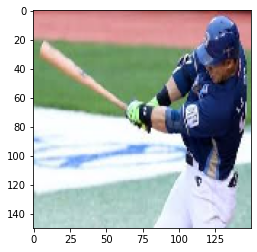

In [36]:
class_name = ['baseball', 'basketball', 'bowlingball', 'soccer']
print(y_train[0])
print(class_name[np.argmax(y_train[0])])
plt.imshow(sample_training_images[0])

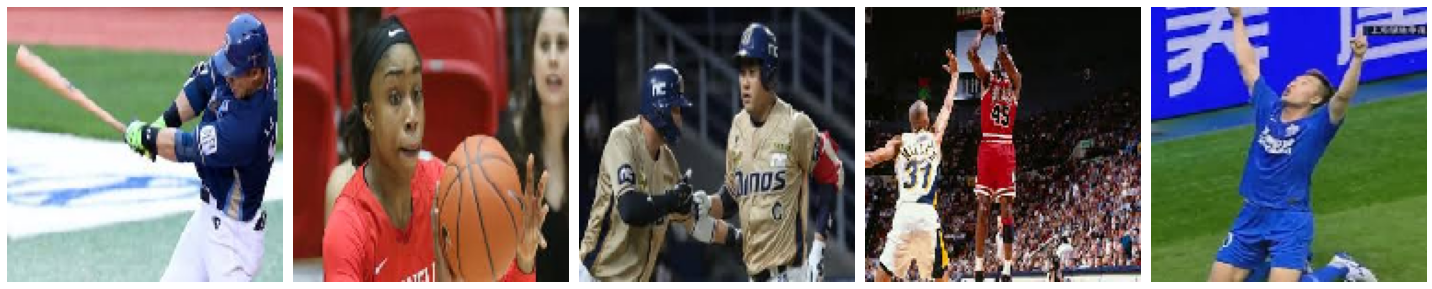

In [38]:
plotImage(sample_training_images[0:5])

In [39]:
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPool2D(),
    Conv2D(32,3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64,3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax') #multi인경우는 분류갯수만큼 노드수
])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [43]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

total_train = 600
total_val = 200

In [44]:
#학습시키는것이 살짝 다르다
#파이썬에서는 //연산자는 나누기 후 몫만 취한 후 나머지는 버림
#train과 validation을 동시실행

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= total_train//batch_size,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = total_val//batch_size
)

Epoch 1/30
60/60 [==============================] - 16s 260ms/step - loss: 1.4667 - accuracy: 0.3467 - val_loss: 1.1606 - val_accuracy: 0.4700
Epoch 2/30
60/60 [==============================] - 13s 223ms/step - loss: 0.9358 - accuracy: 0.6217 - val_loss: 1.0190 - val_accuracy: 0.5500
Epoch 3/30
60/60 [==============================] - 14s 227ms/step - loss: 0.6171 - accuracy: 0.7667 - val_loss: 1.0968 - val_accuracy: 0.5700
Epoch 4/30
60/60 [==============================] - 13s 224ms/step - loss: 0.4135 - accuracy: 0.8483 - val_loss: 1.2577 - val_accuracy: 0.5800
Epoch 5/30
60/60 [==============================] - 14s 234ms/step - loss: 0.2527 - accuracy: 0.9133 - val_loss: 1.2121 - val_accuracy: 0.6200
Epoch 6/30
60/60 [==============================] - 13s 223ms/step - loss: 0.1305 - accuracy: 0.9650 - val_loss: 1.5203 - val_accuracy: 0.6000
Epoch 7/30
60/60 [==============================] - 14s 226ms/step - loss: 0.0743 - accuracy: 0.9750 - val_loss: 1.7083 - val_accuracy: 0.6300

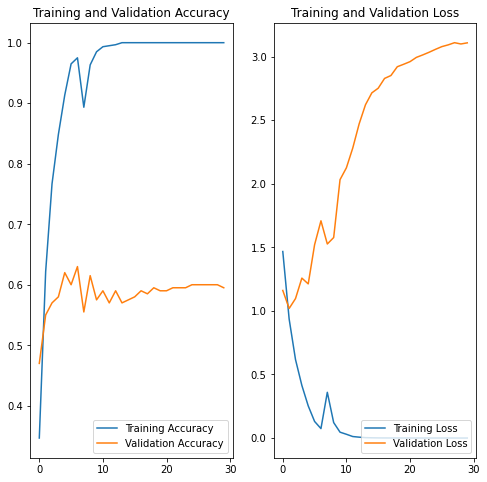

In [45]:
#학습결과값으로 즉 history 그래프를 그려봅시다
#그래프를 통해서 알 수 있는 것을 어느정도의 accuray 갖고 epochs 수는 얼마 좋은지 확인용

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
#batch_size=20, validation 데이터 가지고온다. 소수라서 모두 가져온다.
# 만약 데이터 큰경우 갖고 오고싶은 만큼 가져오면 된다. 예를 들어 2천장이면 2천, 100장이면 100장
val_data_gen = validation_image_generator.flow_from_directory(batch_size=200,
                                                             directory=validation_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 200 images belonging to 4 classes.


In [52]:
test_images, test_labels = next(val_data_gen)

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

200/1 - 1s - loss: 2.7181 - accuracy: 0.5950


In [54]:
len(test_images)

200

In [55]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True) #세로축 기준으로 대칭

In [56]:
#짬뽕하기
image_gen = ImageDataGenerator(rescale=1./255, 
                               zoom_range=0.5,
                              rotation_range=45,
                              width_shift_range=15,
                              height_shift_range=15,
                              horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                             directory=train_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 600 images belonging to 4 classes.


In [57]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [58]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,padding='same', activation='relu'),
    MaxPool2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

In [59]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [60]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= (total_train//batch_size)*5,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = total_val//batch_size
)

Epoch 1/30
300/300 [==============================] - 90s 299ms/step - loss: 0.9175 - accuracy: 0.6373 - val_loss: 0.8923 - val_accuracy: 0.6300
Epoch 2/30
300/300 [==============================] - 87s 288ms/step - loss: 0.7010 - accuracy: 0.7267 - val_loss: 0.9735 - val_accuracy: 0.6150
Epoch 3/30
300/300 [==============================] - 82s 274ms/step - loss: 0.6338 - accuracy: 0.7453 - val_loss: 0.7359 - val_accuracy: 0.7200
Epoch 4/30
300/300 [==============================] - 91s 303ms/step - loss: 0.5467 - accuracy: 0.7800 - val_loss: 0.7809 - val_accuracy: 0.6950
Epoch 5/30
300/300 [==============================] - 88s 294ms/step - loss: 0.4920 - accuracy: 0.8147 - val_loss: 0.7115 - val_accuracy: 0.7400
Epoch 6/30
300/300 [==============================] - 89s 298ms/step - loss: 0.4477 - accuracy: 0.8223 - val_loss: 0.7285 - val_accuracy: 0.7600
Epoch 7/30
300/300 [==============================] - 87s 290ms/step - loss: 0.4252 - accuracy: 0.8420 - val_loss: 0.8844 - val_ac

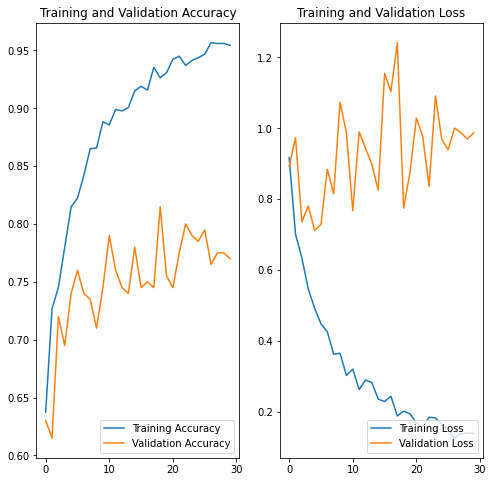

In [63]:
#학습 결과값으로 history그래프
#그래프를 통해서 알수있는 것을 어느정도의 accuracy를 갖고 epochs수는 얼마 조흥ㄴ지 확인용
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [62]:
#모델 저장하기
model.save('classify sports.h5') #적어도 validation score가 0.85가 넘으면 저장

In [76]:
sample_training_images, y_train = next(train_data_gen)

In [77]:
idx = np.argmax(model.predict(sample_training_images), axis=1)

In [78]:
print([class_name[i] for i in list(idx)])

['baseball', 'basketball', 'soccer', 'bowlingball', 'bowlingball', 'bowlingball', 'bowlingball', 'soccer', 'bowlingball', 'bowlingball']


In [79]:
print([class_name[i] for i in list(np.argmax(y_train, axis=1))])

['baseball', 'bowlingball', 'soccer', 'bowlingball', 'bowlingball', 'bowlingball', 'bowlingball', 'soccer', 'bowlingball', 'bowlingball']


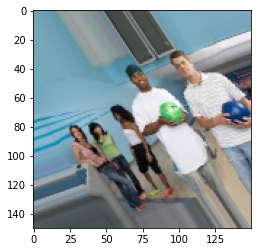

In [81]:
plt.imshow(sample_training_images[1])

In [82]:
#model 성능을 평가하기 위해서 batch_size=200 변경
val_data_gen = validation_image_generator.flow_from_directory(batch_size=200,
                                                             directory=validation_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 200 images belonging to 4 classes.


In [83]:
test_images, test_labels = next(val_data_gen)

In [84]:
len(test_images)

200

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

200/1 - 1s - loss: 0.7348 - accuracy: 0.7700


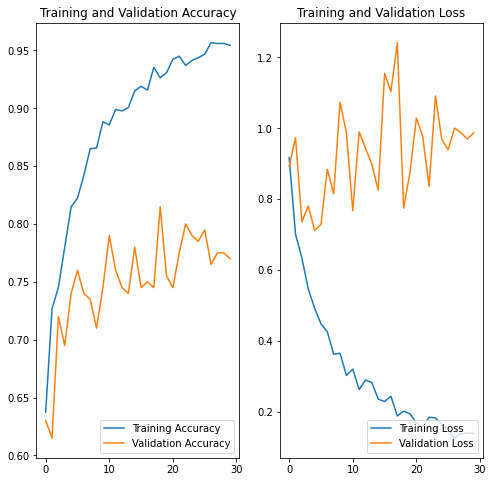

In [87]:
#학습 결과값으로 history그래프
#그래프를 통해서 알수있는 것을 어느정도의 accuracy를 갖고 epochs수는 얼마 조흥ㄴ지 확인용
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
real_validation_dir = os.path.join(PATH, 'real_validation')

In [89]:
real_validation_dir

'C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법/실습데이터/sports\\real_validation'

In [91]:
#model 성능을 평가하기 위해서 batch_size=200 변경
val_data_gen = validation_image_generator.flow_from_directory(batch_size=1,
                                                             directory=real_validation_dir,
                                                             shuffle=True,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='categorical')

Found 1 images belonging to 4 classes.


In [92]:
real_image, real_label = next(val_data_gen)

In [96]:
np.argmax(model.predict(real_image))

3

In [98]:
class_name[np.argmax(model.predict(real_image))]

'soccer'

In [99]:
model.predict_proba(real_image)

array([[2.9430934e-04, 3.3766323e-10, 9.3758095e-09, 9.9970561e-01]],
      dtype=float32)